In [525]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import r2_score
import xgboost
import math

In [526]:
data = pd.read_csv('Auto.csv')

In [527]:
data.head()

,Year,Make,Model,Car Name,Wheel Drive,Colour,Odometer,Inv,VIN,Retail,Price
0,2002,Chrysler,Concorde LXi FWD,Chrysler Concorde,FWD,SILVER,245305,I,2C3HD36M32H196490,AUTO,1200
1,2004,Jeep,Liberty Limited 4WD,Jeep Liberty,4WD,black,205000,I,1J4GL58K74W203537,AUTO,1200
2,2005,Chevrolet,Malibu LS FWD,Chevrolet Malibu,FWD,WHITE,199885,I,1G1ZT52875F158217,AUTO,1200
3,2006,Ford,F-150 XLT 4x4,Ford F-150,4WD,Black Clearcoat,176880,I,1FTRW14W16KB59343,AUTO,0
4,2006,Nissan,Altima 2.5 S FWD,Nissan Altima,FWD,Blue,206598,I,1N4AL11D96C124803,AUTO,1200


In [528]:
data.tail()

,Year,Make,Model,Car Name,Wheel Drive,Colour,Odometer,Inv,VIN,Retail,Price
215,2019,Chevrolet,Spark LT FWD,Chevrolet Spark,FWD,Blue,32700,I,KL8CD6SA1KC776013,AUTO,14300
216,2019,Hyundai,Veloster 2.0 GL - RENTAL FWD,Hyundai Veloster,FWD,WHITE,47314,I,KMHTG6AF8KU008174,AUTO,16995
217,2019,Kia,Soul EX - RENTAL FWD,Kia Soul,FWD,WHITE,38790,I,KNDJP3A50K7909751,AUTO,17900
218,2019,Nissan,Micra S Rental FWD,Nissan Micra,FWD,Black,17836,I,3N1CK3CP6KL214890,AUTO,14700
219,2019,Nissan,Micra S - rental FWD,Nissan Micra,FWD,WHITE,20225,I,3N1CK3CP3KL217164,AUTO,14300


In [529]:
data.shape

(220, 11)

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
Year           220 non-null int64
Make           220 non-null object
Model          220 non-null object
Car Name       220 non-null object
Wheel Drive    220 non-null object
Colour         218 non-null object
Odometer       220 non-null int64
Inv            220 non-null object
VIN            220 non-null object
Retail         220 non-null object
Price          220 non-null int64
dtypes: int64(3), object(8)
memory usage: 19.0+ KB


In [531]:
data.describe()

,Year,Odometer,Price
count,220.000000,220.000000,220.000000
mean,2015.386364,70621.022727,16436.545455
std,2.356531,46718.323024,5045.752147
min,2002.000000,0.000000,0.000000
25%,2015.000000,47590.000000,13700.000000
50%,2016.000000,63728.000000,15995.000000
75%,2017.000000,81488.750000,19625.000000
max,2019.000000,494156.000000,30900.000000


In [532]:
data.isnull().sum()

Year           0
Make           0
Model          0
Car Name       0
Wheel Drive    0
Colour         2
Odometer       0
Inv            0
VIN            0
Retail         0
Price          0
dtype: int64

In [533]:
data['Colour'].fillna( method ='ffill', inplace = True)

In [534]:
data.isnull().sum()

Year           0
Make           0
Model          0
Car Name       0
Wheel Drive    0
Colour         0
Odometer       0
Inv            0
VIN            0
Retail         0
Price          0
dtype: int64

In [535]:

data['Model'].nunique()

173

In [536]:
data['Car Name'].nunique()

82

In [537]:
data['Make'].nunique()

22

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

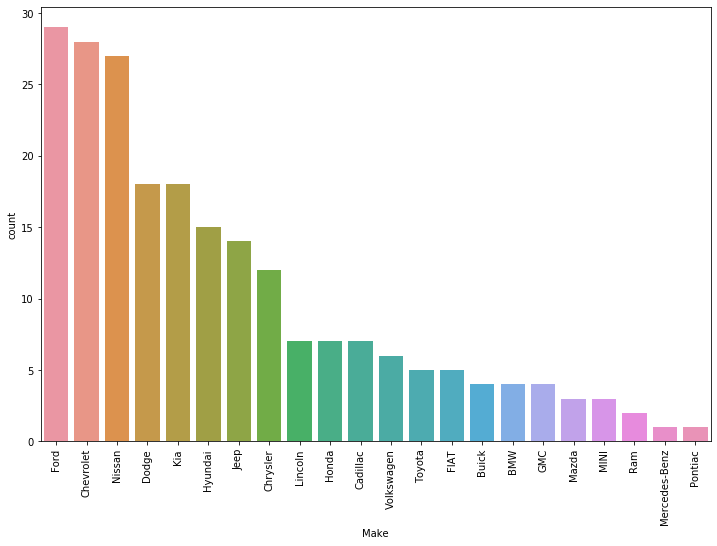

In [538]:

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Make'], data = data,order = data['Make'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

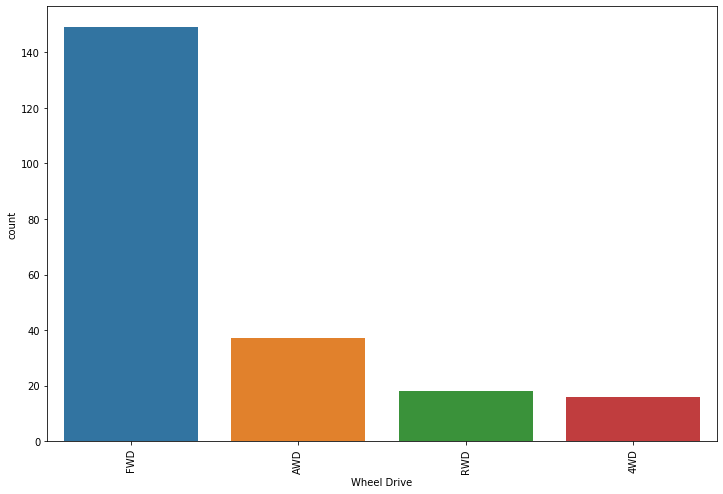

In [539]:

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Wheel Drive'], data = data,order = data['Wheel Drive'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

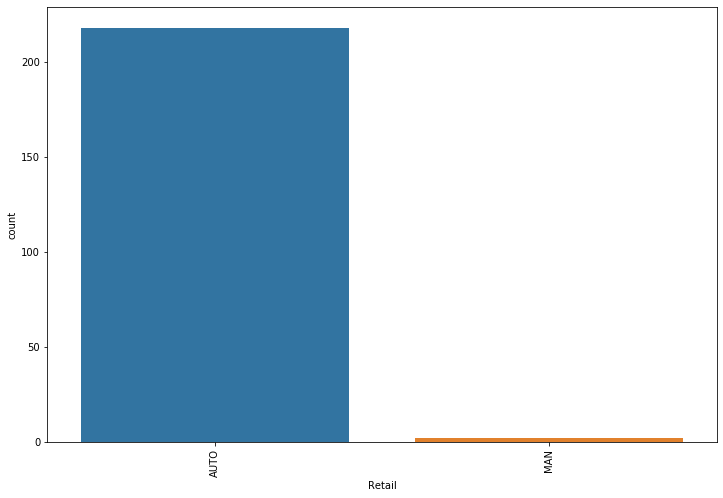

In [540]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Retail'], data = data,order = data['Retail'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [541]:
# Unique Manufacture names.
print("Color Names: " , data['Colour'].unique())

Color Names:  ['SILVER' 'black' 'WHITE' 'Black Clearcoat' 'Blue' 'Copper' 'silver'
 'Green' 'Black' 'BLACK' 'Red' 'White' 'Grey' 'Silver' 'Maroon'
 'Summit White' 'Yellow' 'GRAY' 'BROWN' 'P8163' 'Billet Metallic' 'GREY'
 'Brown' 'BLUE' 'Beige' 'RED' 'Cream' 'Gold' 'Black Cherry']


In [542]:
data['Colour'].replace(to_replace =["silver"],  
                            value ="SILVER",inplace=True) 
data['Colour'].replace(to_replace =["Silver"],  
                            value ="SILVER",inplace=True)
data['Colour'].replace(to_replace =["black"],  
                            value ="BLACK",inplace=True) 
data['Colour'].replace(to_replace =["Black"],  
                            value ="BLACK",inplace=True) 
data['Colour'].replace(to_replace =["White"],  
                            value ="WHITE",inplace=True)
data['Colour'].replace(to_replace =["Blue"],  
                            value ="BLUE",inplace=True) 
data['Colour'].replace(to_replace =["Red"],  
                            value ="RED",inplace=True)
data['Colour'].replace(to_replace =["Grey"],  
                            value ="GREY",inplace=True)
data['Colour'].replace(to_replace =["GRAY"],  
                            value ="GREY",inplace=True)
data['Colour'].replace(to_replace =["Brown"],  
                            value ="BROWN",inplace=True)
data['Colour'].replace(to_replace =["P8163"],  
                            value ="GREY",inplace=True)

In [543]:
# Unique Manufacture names.
print("Color Names: " , data['Colour'].unique())

Color Names:  ['SILVER' 'BLACK' 'WHITE' 'Black Clearcoat' 'BLUE' 'Copper' 'Green' 'RED'
 'GREY' 'Maroon' 'Summit White' 'Yellow' 'BROWN' 'Billet Metallic' 'Beige'
 'Cream' 'Gold' 'Black Cherry']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

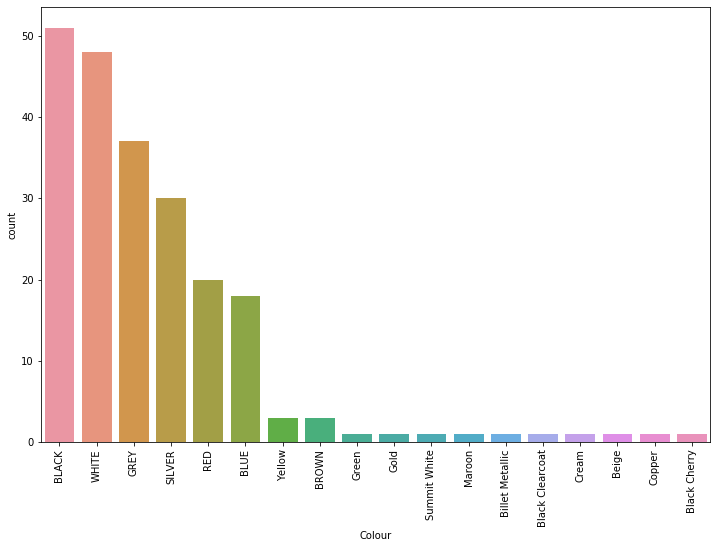

In [544]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Colour'], data = data,order = data['Colour'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [545]:
cars = data.drop(['Make','Model','Inv','VIN',],axis=1)

In [546]:
cars.head()

,Year,Car Name,Wheel Drive,Colour,Odometer,Retail,Price
0,2002,Chrysler Concorde,FWD,SILVER,245305,AUTO,1200
1,2004,Jeep Liberty,4WD,BLACK,205000,AUTO,1200
2,2005,Chevrolet Malibu,FWD,WHITE,199885,AUTO,1200
3,2006,Ford F-150,4WD,Black Clearcoat,176880,AUTO,0
4,2006,Nissan Altima,FWD,BLUE,206598,AUTO,1200


In [547]:
# Create a new column showing the number of years. 
year = 2020
cars['No_of_Years'] = cars['Year'].apply(lambda x :year - x)
cars.drop('Year',axis=1)

,Car Name,Wheel Drive,Colour,Odometer,Retail,Price,No_of_Years
0,Chrysler Concorde,FWD,SILVER,245305,AUTO,1200,18
1,Jeep Liberty,4WD,BLACK,205000,AUTO,1200,16
2,Chevrolet Malibu,FWD,WHITE,199885,AUTO,1200,15
3,Ford F-150,4WD,Black Clearcoat,176880,AUTO,0,14
4,Nissan Altima,FWD,BLUE,206598,AUTO,1200,14
...,...,...,...,...,...,...,...
215,Chevrolet Spark,FWD,BLUE,32700,AUTO,14300,1
216,Hyundai Veloster,FWD,WHITE,47314,AUTO,16995,1
217,Kia Soul,FWD,WHITE,38790,AUTO,17900,1
218,Nissan Micra,FWD,BLACK,17836,AUTO,14700,1


In [548]:
# Convert the categorical values into dummies using the get_dummies function  
df=pd.get_dummies(cars['Car Name'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Car Name'],axis=1,inplace=True)
df=pd.get_dummies(cars['Wheel Drive'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Wheel Drive'],axis=1,inplace=True)
df=pd.get_dummies(cars['Colour'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Colour'],axis=1,inplace=True)
df=pd.get_dummies(cars['Retail'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Retail'],axis=1,inplace=True)

In [549]:
cars.drop(['Year'],axis=1,inplace=True)
cars.head()

,Odometer,Price,No_of_Years,BMW 3,BMW X3,Buick Encore,Buick Regal,Buick Verano,Cadillac ATS,Cadillac SRX,...,Cream,GREY,Gold,Green,Maroon,RED,SILVER,Summit White,WHITE,AUTO
0,245305,1200,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,205000,1200,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,199885,1200,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,176880,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,206598,1200,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building 

In [550]:
X = cars.drop('Price',axis=1)
Y = cars['Price']

In [551]:
X.head()

,Odometer,No_of_Years,BMW 3,BMW X3,Buick Encore,Buick Regal,Buick Verano,Cadillac ATS,Cadillac SRX,Cadillac XTS,...,Cream,GREY,Gold,Green,Maroon,RED,SILVER,Summit White,WHITE,AUTO
0,245305,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,205000,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,199885,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,176880,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,206598,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [552]:
Y.head()

0    1200
1    1200
2    1200
3       0
4    1200
Name: Price, dtype: int64

In [553]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [554]:
minma = MinMaxScaler()
minma.fit(X_train)
X_train = minma.transform(X_train)
X_test = minma.transform(X_test)

# Random Forest Regressor

In [555]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train,y_train)
train_pred = rf_reg.predict(X_train)
test_pred=rf_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(rf_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(rf_reg.score(X_train,y_train)))

Accuracy for Test set: 0.73
Accuracy for Training set: 0.96


In [556]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 4.5
Tree on test set MAE%: 12.0


In [557]:
math.sqrt(mean_squared_error(y_test,test_pred))

2720.8104523519896

# Decision Tree Regressor

In [558]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train,y_train)
train_pred = dec_reg.predict(X_train)
test_pred=dec_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(dec_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(dec_reg.score(X_train,y_train)))

Accuracy for Test set: 0.49
Accuracy for Training set: 1.00


In [559]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 16.4


In [560]:
math.sqrt(mean_squared_error(y_test,test_pred))

3771.415667407086

# Linear Regression

In [561]:
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(reg.score(X_train,y_train)))

Accuracy for Test set: -790058709270002982191104.00
Accuracy for Training set: 0.94


In [562]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 5.2
Tree on test set MAE%: 6782234639112.4


In [563]:
math.sqrt(mean_squared_error(y_test,test_pred))

4695386783326496.0

# K Neighbor Regressor

In [564]:
k_reg=KNeighborsRegressor()
k_reg = k_reg.fit(X_train,y_train)
train_pred = k_reg.predict(X_train)
test_pred=k_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(k_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(k_reg.score(X_train,y_train)))

Accuracy for Test set: 0.54
Accuracy for Training set: 0.58


In [565]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 14.2
Tree on test set MAE%: 16.3


In [566]:
math.sqrt(mean_squared_error(y_test,test_pred))

3595.8954757789156

# Gradient Boosting Regressor

In [567]:
gb_reg = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=300,
                                random_state=10)
gb_reg.fit(X_train,y_train)
train_pred = gb_reg.predict(X_train)
test_pred=gb_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(gb_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(gb_reg.score(X_train,y_train)))

Accuracy for Test set: 0.44
Accuracy for Training set: 0.57


In [568]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 15.2
Tree on test set MAE%: 18.2


In [569]:
math.sqrt(mean_squared_error(y_test,test_pred))

3935.6608373117283

# Artificial Neural Network (keras)

In [589]:
np.random.seed(1337)
model = Sequential()
model.add(Dense(200,activation='relu',input_dim=104))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [590]:
model.compile(optimizer ='adam', loss='mse')
model.fit(X_train, y_train, epochs=2000,batch_size=16,shuffle=False)

Epoch 1/2000
176/176 [==============================] - 0s 2ms/step - loss: 290606891.6364
Epoch 2/2000
176/176 [==============================] - 0s 163us/step - loss: 290552674.9091
Epoch 3/2000
176/176 [==============================] - 0s 177us/step - loss: 290448769.4545
Epoch 4/2000
176/176 [==============================] - 0s 163us/step - loss: 290252686.5455
Epoch 5/2000
176/176 [==============================] - 0s 196us/step - loss: 289906241.4545
Epoch 6/2000
176/176 [==============================] - 0s 175us/step - loss: 289315038.5455
Epoch 7/2000
176/176 [==============================] - 0s 195us/step - loss: 288389211.6364
Epoch 8/2000
176/176 [==============================] - 0s 176us/step - loss: 287004266.1818
Epoch 9/2000
176/176 [==============================] - 0s 179us/step - loss: 285086180.3636
Epoch 10/2000
176/176 [==============================] - 0s 170us/step - loss: 282458980.3636
Epoch 11/2000
176/176 [==============================] - 0s 179us/step 

176/176 [==============================] - 0s 186us/step - loss: 20912833.5000
Epoch 89/2000
176/176 [==============================] - 0s 191us/step - loss: 21622097.7727
Epoch 90/2000
176/176 [==============================] - 0s 217us/step - loss: 19472466.0909
Epoch 91/2000
176/176 [==============================] - 0s 194us/step - loss: 19121891.9091
Epoch 92/2000
176/176 [==============================] - 0s 203us/step - loss: 18223409.5000
Epoch 93/2000
176/176 [==============================] - 0s 198us/step - loss: 19078757.3636
Epoch 94/2000
176/176 [==============================] - 0s 201us/step - loss: 20275388.8182
Epoch 95/2000
176/176 [==============================] - 0s 172us/step - loss: 19096959.9545
Epoch 96/2000
176/176 [==============================] - 0s 211us/step - loss: 18382501.4091
Epoch 97/2000
176/176 [==============================] - 0s 176us/step - loss: 19746072.7727
Epoch 98/2000
176/176 [==============================] - 0s 182us/step - loss: 17922

176/176 [==============================] - 0s 205us/step - loss: 10380369.7955
Epoch 176/2000
176/176 [==============================] - 0s 204us/step - loss: 9456204.4091
Epoch 177/2000
176/176 [==============================] - 0s 200us/step - loss: 9179508.5455
Epoch 178/2000
176/176 [==============================] - 0s 189us/step - loss: 9585295.8182
Epoch 179/2000
176/176 [==============================] - 0s 172us/step - loss: 9369553.3636
Epoch 180/2000
176/176 [==============================] - 0s 169us/step - loss: 9109042.8182
Epoch 181/2000
176/176 [==============================] - 0s 176us/step - loss: 8872837.1364
Epoch 182/2000
176/176 [==============================] - 0s 175us/step - loss: 8970039.1591
Epoch 183/2000
176/176 [==============================] - 0s 210us/step - loss: 10017828.4091
Epoch 184/2000
176/176 [==============================] - 0s 223us/step - loss: 9422095.7727
Epoch 185/2000
176/176 [==============================] - 0s 268us/step - loss: 941

176/176 [==============================] - 0s 233us/step - loss: 6100865.5000
Epoch 264/2000
176/176 [==============================] - 0s 207us/step - loss: 5148392.5455
Epoch 265/2000
176/176 [==============================] - 0s 219us/step - loss: 5127197.1932
Epoch 266/2000
176/176 [==============================] - 0s 239us/step - loss: 5204670.3636
Epoch 267/2000
176/176 [==============================] - 0s 202us/step - loss: 5602770.7273
Epoch 268/2000
176/176 [==============================] - 0s 221us/step - loss: 4246149.8864
Epoch 269/2000
176/176 [==============================] - 0s 223us/step - loss: 5165266.0682
Epoch 270/2000
176/176 [==============================] - 0s 254us/step - loss: 5419121.1364
Epoch 271/2000
176/176 [==============================] - 0s 196us/step - loss: 5332358.9318
Epoch 272/2000
176/176 [==============================] - 0s 194us/step - loss: 4671102.3409
Epoch 273/2000
176/176 [==============================] - 0s 174us/step - loss: 47301

Epoch 351/2000
176/176 [==============================] - 0s 164us/step - loss: 3923008.5341
Epoch 352/2000
176/176 [==============================] - 0s 174us/step - loss: 3927836.1477
Epoch 353/2000
176/176 [==============================] - 0s 162us/step - loss: 3748998.9886
Epoch 354/2000
176/176 [==============================] - 0s 166us/step - loss: 3605048.0795
Epoch 355/2000
176/176 [==============================] - 0s 159us/step - loss: 3975976.0455
Epoch 356/2000
176/176 [==============================] - 0s 161us/step - loss: 4216417.4318
Epoch 357/2000
176/176 [==============================] - 0s 162us/step - loss: 4052583.3523
Epoch 358/2000
176/176 [==============================] - 0s 160us/step - loss: 3500517.7273
Epoch 359/2000
176/176 [==============================] - 0s 141us/step - loss: 4688210.3977
Epoch 360/2000
176/176 [==============================] - 0s 162us/step - loss: 4738100.4318
Epoch 361/2000
176/176 [==============================] - 0s 151us/ste

176/176 [==============================] - 0s 180us/step - loss: 3939943.5682
Epoch 439/2000
176/176 [==============================] - 0s 183us/step - loss: 3406627.5909
Epoch 440/2000
176/176 [==============================] - 0s 179us/step - loss: 4294140.0227
Epoch 441/2000
176/176 [==============================] - 0s 203us/step - loss: 3477293.5568
Epoch 442/2000
176/176 [==============================] - 0s 159us/step - loss: 3522444.2841
Epoch 443/2000
176/176 [==============================] - 0s 154us/step - loss: 3735249.9773
Epoch 444/2000
176/176 [==============================] - 0s 156us/step - loss: 3421821.0114
Epoch 445/2000
176/176 [==============================] - 0s 176us/step - loss: 3663667.0568
Epoch 446/2000
176/176 [==============================] - 0s 158us/step - loss: 3736586.0000
Epoch 447/2000
176/176 [==============================] - 0s 154us/step - loss: 3502663.1364
Epoch 448/2000
176/176 [==============================] - 0s 160us/step - loss: 36594

176/176 [==============================] - 0s 194us/step - loss: 3195389.1364
Epoch 527/2000
176/176 [==============================] - 0s 194us/step - loss: 3941269.6591
Epoch 528/2000
176/176 [==============================] - 0s 279us/step - loss: 3695635.1705
Epoch 529/2000
176/176 [==============================] - 0s 194us/step - loss: 3206755.4432
Epoch 530/2000
176/176 [==============================] - 0s 227us/step - loss: 3382716.0114
Epoch 531/2000
176/176 [==============================] - 0s 195us/step - loss: 3624822.0568
Epoch 532/2000
176/176 [==============================] - 0s 150us/step - loss: 3391527.5795
Epoch 533/2000
176/176 [==============================] - 0s 205us/step - loss: 3930666.9545
Epoch 534/2000
176/176 [==============================] - 0s 224us/step - loss: 3943831.7955
Epoch 535/2000
176/176 [==============================] - 0s 195us/step - loss: 3484637.8068
Epoch 536/2000
176/176 [==============================] - 0s 198us/step - loss: 35859

176/176 [==============================] - 0s 152us/step - loss: 2820784.0341
Epoch 615/2000
176/176 [==============================] - 0s 215us/step - loss: 4029845.6818
Epoch 616/2000
176/176 [==============================] - 0s 210us/step - loss: 3620954.1591
Epoch 617/2000
176/176 [==============================] - 0s 222us/step - loss: 3370839.1136
Epoch 618/2000
176/176 [==============================] - 0s 212us/step - loss: 3571735.7045
Epoch 619/2000
176/176 [==============================] - 0s 257us/step - loss: 3392074.8068
Epoch 620/2000
176/176 [==============================] - 0s 201us/step - loss: 3004486.0909
Epoch 621/2000
176/176 [==============================] - 0s 218us/step - loss: 3621448.5682
Epoch 622/2000
176/176 [==============================] - 0s 182us/step - loss: 3412030.0682
Epoch 623/2000
176/176 [==============================] - 0s 183us/step - loss: 3629138.2727
Epoch 624/2000
176/176 [==============================] - 0s 184us/step - loss: 32076

176/176 [==============================] - 0s 250us/step - loss: 2730545.3750
Epoch 703/2000
176/176 [==============================] - 0s 227us/step - loss: 3550569.6591
Epoch 704/2000
176/176 [==============================] - 0s 220us/step - loss: 3744194.9773
Epoch 705/2000
176/176 [==============================] - 0s 157us/step - loss: 3193111.0795
Epoch 706/2000
176/176 [==============================] - 0s 175us/step - loss: 3440440.7500
Epoch 707/2000
176/176 [==============================] - 0s 198us/step - loss: 3281594.1364
Epoch 708/2000
176/176 [==============================] - 0s 209us/step - loss: 3503761.6818
Epoch 709/2000
176/176 [==============================] - 0s 161us/step - loss: 3585242.0455
Epoch 710/2000
176/176 [==============================] - 0s 222us/step - loss: 3002965.9659
Epoch 711/2000
176/176 [==============================] - 0s 223us/step - loss: 3208454.1932
Epoch 712/2000
176/176 [==============================] - 0s 217us/step - loss: 31049

176/176 [==============================] - 0s 229us/step - loss: 3588356.7614
Epoch 791/2000
176/176 [==============================] - 0s 191us/step - loss: 3319595.8636
Epoch 792/2000
176/176 [==============================] - 0s 184us/step - loss: 3699024.7500
Epoch 793/2000
176/176 [==============================] - 0s 200us/step - loss: 2851492.2841
Epoch 794/2000
176/176 [==============================] - 0s 212us/step - loss: 3049012.2614
Epoch 795/2000
176/176 [==============================] - 0s 220us/step - loss: 2824380.2045
Epoch 796/2000
176/176 [==============================] - 0s 203us/step - loss: 3431186.0114
Epoch 797/2000
176/176 [==============================] - 0s 204us/step - loss: 3308560.4205
Epoch 798/2000
176/176 [==============================] - 0s 194us/step - loss: 3854564.8523
Epoch 799/2000
176/176 [==============================] - 0s 190us/step - loss: 3183807.6818
Epoch 800/2000
176/176 [==============================] - 0s 209us/step - loss: 35343

176/176 [==============================] - 0s 185us/step - loss: 3014231.0909
Epoch 878/2000
176/176 [==============================] - 0s 230us/step - loss: 3121628.3750
Epoch 879/2000
176/176 [==============================] - 0s 183us/step - loss: 2761400.8523
Epoch 880/2000
176/176 [==============================] - 0s 156us/step - loss: 3159657.8409
Epoch 881/2000
176/176 [==============================] - 0s 230us/step - loss: 3005956.6364
Epoch 882/2000
176/176 [==============================] - 0s 224us/step - loss: 3522357.0455
Epoch 883/2000
176/176 [==============================] - 0s 208us/step - loss: 3269315.6818
Epoch 884/2000
176/176 [==============================] - 0s 170us/step - loss: 3378849.4545
Epoch 885/2000
176/176 [==============================] - 0s 171us/step - loss: 3093800.5341
Epoch 886/2000
176/176 [==============================] - 0s 179us/step - loss: 3829205.9432
Epoch 887/2000
176/176 [==============================] - 0s 153us/step - loss: 32764

176/176 [==============================] - 0s 172us/step - loss: 3797336.1364
Epoch 966/2000
176/176 [==============================] - 0s 203us/step - loss: 3239924.6364
Epoch 967/2000
176/176 [==============================] - 0s 167us/step - loss: 2942073.7955
Epoch 968/2000
176/176 [==============================] - 0s 187us/step - loss: 3106419.8523
Epoch 969/2000
176/176 [==============================] - 0s 172us/step - loss: 3167714.7727
Epoch 970/2000
176/176 [==============================] - 0s 220us/step - loss: 3995171.9773
Epoch 971/2000
176/176 [==============================] - 0s 172us/step - loss: 3434547.1364
Epoch 972/2000
176/176 [==============================] - 0s 251us/step - loss: 3518715.2273
Epoch 973/2000
176/176 [==============================] - 0s 182us/step - loss: 2908505.4091
Epoch 974/2000
176/176 [==============================] - 0s 156us/step - loss: 3739446.9773
Epoch 975/2000
176/176 [==============================] - 0s 197us/step - loss: 30114

176/176 [==============================] - 0s 202us/step - loss: 3443679.6591
Epoch 1053/2000
176/176 [==============================] - 0s 218us/step - loss: 3535841.5455
Epoch 1054/2000
176/176 [==============================] - 0s 190us/step - loss: 3301560.2727
Epoch 1055/2000
176/176 [==============================] - 0s 225us/step - loss: 3617298.0000
Epoch 1056/2000
176/176 [==============================] - 0s 157us/step - loss: 3368024.2841
Epoch 1057/2000
176/176 [==============================] - 0s 267us/step - loss: 3524061.6705
Epoch 1058/2000
176/176 [==============================] - 0s 213us/step - loss: 3287755.8636
Epoch 1059/2000
176/176 [==============================] - 0s 224us/step - loss: 3365908.0682
Epoch 1060/2000
176/176 [==============================] - ETA: 0s - loss: 2327466.250 - 0s 188us/step - loss: 3986457.4205
Epoch 1061/2000
176/176 [==============================] - 0s 181us/step - loss: 3141598.6818
Epoch 1062/2000
176/176 [=====================

176/176 [==============================] - 0s 216us/step - loss: 2704937.7273
Epoch 1139/2000
176/176 [==============================] - 0s 180us/step - loss: 3515148.4318
Epoch 1140/2000
176/176 [==============================] - 0s 144us/step - loss: 3378779.8182
Epoch 1141/2000
176/176 [==============================] - 0s 251us/step - loss: 2993429.7500
Epoch 1142/2000
176/176 [==============================] - 0s 178us/step - loss: 3452327.0909
Epoch 1143/2000
176/176 [==============================] - 0s 266us/step - loss: 3495424.3182
Epoch 1144/2000
176/176 [==============================] - 0s 212us/step - loss: 3104210.1932
Epoch 1145/2000
176/176 [==============================] - 0s 205us/step - loss: 2879703.6818
Epoch 1146/2000
176/176 [==============================] - 0s 186us/step - loss: 3206587.2045
Epoch 1147/2000
176/176 [==============================] - 0s 211us/step - loss: 3168082.3409
Epoch 1148/2000
176/176 [==============================] - 0s 150us/step - l

176/176 [==============================] - 0s 172us/step - loss: 3186553.5341
Epoch 1226/2000
176/176 [==============================] - 0s 272us/step - loss: 3068450.8750
Epoch 1227/2000
176/176 [==============================] - 0s 185us/step - loss: 3615878.7273
Epoch 1228/2000
176/176 [==============================] - 0s 250us/step - loss: 3225818.1250
Epoch 1229/2000
176/176 [==============================] - 0s 173us/step - loss: 3858489.5682
Epoch 1230/2000
176/176 [==============================] - 0s 149us/step - loss: 2954570.3807
Epoch 1231/2000
176/176 [==============================] - 0s 135us/step - loss: 3130476.1023
Epoch 1232/2000
176/176 [==============================] - 0s 283us/step - loss: 3052686.5795
Epoch 1233/2000
176/176 [==============================] - 0s 191us/step - loss: 3272132.7500
Epoch 1234/2000
176/176 [==============================] - 0s 195us/step - loss: 3405439.0000
Epoch 1235/2000
176/176 [==============================] - 0s 185us/step - l

176/176 [==============================] - 0s 139us/step - loss: 3326015.7955
Epoch 1313/2000
176/176 [==============================] - 0s 245us/step - loss: 2421752.6250
Epoch 1314/2000
176/176 [==============================] - 0s 203us/step - loss: 3343162.4318
Epoch 1315/2000
176/176 [==============================] - 0s 183us/step - loss: 3173220.4886
Epoch 1316/2000
176/176 [==============================] - 0s 159us/step - loss: 3481207.8295
Epoch 1317/2000
176/176 [==============================] - 0s 236us/step - loss: 3071173.3523
Epoch 1318/2000
176/176 [==============================] - ETA: 0s - loss: 4631828.000 - 0s 187us/step - loss: 3240521.7955
Epoch 1319/2000
176/176 [==============================] - 0s 168us/step - loss: 3511522.1705
Epoch 1320/2000
176/176 [==============================] - 0s 125us/step - loss: 3195039.8864
Epoch 1321/2000
176/176 [==============================] - 0s 211us/step - loss: 2984940.0227
Epoch 1322/2000
176/176 [=====================

176/176 [==============================] - 0s 175us/step - loss: 3297520.4773
Epoch 1399/2000
176/176 [==============================] - 0s 177us/step - loss: 3070330.3523
Epoch 1400/2000
176/176 [==============================] - 0s 221us/step - loss: 2939171.4318
Epoch 1401/2000
176/176 [==============================] - 0s 175us/step - loss: 3143568.7955
Epoch 1402/2000
176/176 [==============================] - 0s 154us/step - loss: 3359132.5000
Epoch 1403/2000
176/176 [==============================] - 0s 132us/step - loss: 3091162.5000
Epoch 1404/2000
176/176 [==============================] - 0s 269us/step - loss: 3353575.8295
Epoch 1405/2000
176/176 [==============================] - 0s 216us/step - loss: 3774263.1023
Epoch 1406/2000
176/176 [==============================] - 0s 204us/step - loss: 2859782.5114
Epoch 1407/2000
176/176 [==============================] - 0s 217us/step - loss: 2703202.1364
Epoch 1408/2000
176/176 [==============================] - 0s 145us/step - l

176/176 [==============================] - 0s 216us/step - loss: 3055408.5000
Epoch 1486/2000
176/176 [==============================] - 0s 195us/step - loss: 3172837.2386
Epoch 1487/2000
176/176 [==============================] - 0s 234us/step - loss: 3400143.1932
Epoch 1488/2000
176/176 [==============================] - 0s 249us/step - loss: 3518348.5000
Epoch 1489/2000
176/176 [==============================] - 0s 192us/step - loss: 2786346.4318
Epoch 1490/2000
176/176 [==============================] - 0s 176us/step - loss: 3170134.7614
Epoch 1491/2000
176/176 [==============================] - 0s 209us/step - loss: 3452651.6591
Epoch 1492/2000
176/176 [==============================] - 0s 206us/step - loss: 2795921.7273
Epoch 1493/2000
176/176 [==============================] - 0s 204us/step - loss: 3370140.0795
Epoch 1494/2000
176/176 [==============================] - 0s 197us/step - loss: 3401823.1705
Epoch 1495/2000
176/176 [==============================] - 0s 243us/step - l

176/176 [==============================] - 0s 156us/step - loss: 3285141.3182
Epoch 1573/2000
176/176 [==============================] - 0s 214us/step - loss: 2677561.1250
Epoch 1574/2000
176/176 [==============================] - 0s 244us/step - loss: 3316796.9659
Epoch 1575/2000
176/176 [==============================] - 0s 170us/step - loss: 2871224.3977
Epoch 1576/2000
176/176 [==============================] - 0s 204us/step - loss: 3118047.4545
Epoch 1577/2000
176/176 [==============================] - 0s 179us/step - loss: 3150444.9773
Epoch 1578/2000
176/176 [==============================] - 0s 160us/step - loss: 3797916.0114
Epoch 1579/2000
176/176 [==============================] - 0s 222us/step - loss: 2684718.5909
Epoch 1580/2000
176/176 [==============================] - 0s 184us/step - loss: 3526264.8750
Epoch 1581/2000
176/176 [==============================] - 0s 155us/step - loss: 3341920.8295
Epoch 1582/2000
176/176 [==============================] - 0s 238us/step - l

176/176 [==============================] - 0s 91us/step - loss: 2953172.2273
Epoch 1659/2000
176/176 [==============================] - 0s 178us/step - loss: 3656987.3295
Epoch 1660/2000
176/176 [==============================] - 0s 178us/step - loss: 3409185.6023
Epoch 1661/2000
176/176 [==============================] - 0s 178us/step - loss: 3298502.0909
Epoch 1662/2000
176/176 [==============================] - 0s 178us/step - loss: 3113380.3295
Epoch 1663/2000
176/176 [==============================] - 0s 203us/step - loss: 3001545.6591
Epoch 1664/2000
176/176 [==============================] - 0s 181us/step - loss: 2885295.8750
Epoch 1665/2000
176/176 [==============================] - 0s 187us/step - loss: 3697551.2386
Epoch 1666/2000
176/176 [==============================] - 0s 181us/step - loss: 2498087.8750
Epoch 1667/2000
176/176 [==============================] - 0s 181us/step - loss: 3023549.6591
Epoch 1668/2000
176/176 [==============================] - ETA: 0s - loss: 42

176/176 [==============================] - 0s 178us/step - loss: 2796556.0114
Epoch 1746/2000
176/176 [==============================] - 0s 178us/step - loss: 3386266.3636
Epoch 1747/2000
176/176 [==============================] - 0s 178us/step - loss: 3004272.6023
Epoch 1748/2000
176/176 [==============================] - 0s 220us/step - loss: 3536303.7045
Epoch 1749/2000
176/176 [==============================] - 0s 130us/step - loss: 3879005.3636
Epoch 1750/2000
176/176 [==============================] - 0s 178us/step - loss: 3112785.6591
Epoch 1751/2000
176/176 [==============================] - 0s 178us/step - loss: 2985710.1364
Epoch 1752/2000
176/176 [==============================] - 0s 252us/step - loss: 4585100.5682
Epoch 1753/2000
176/176 [==============================] - 0s 170us/step - loss: 3307318.4545
Epoch 1754/2000
176/176 [==============================] - 0s 176us/step - loss: 3066589.1818
Epoch 1755/2000
176/176 [==============================] - 0s 181us/step - l

176/176 [==============================] - 0s 164us/step - loss: 3549122.1591
Epoch 1833/2000
176/176 [==============================] - 0s 164us/step - loss: 3063278.1705
Epoch 1834/2000
176/176 [==============================] - 0s 170us/step - loss: 2669813.8409
Epoch 1835/2000
176/176 [==============================] - 0s 164us/step - loss: 2916095.6364
Epoch 1836/2000
176/176 [==============================] - 0s 159us/step - loss: 3394195.5227
Epoch 1837/2000
176/176 [==============================] - 0s 164us/step - loss: 3045448.7727
Epoch 1838/2000
176/176 [==============================] - 0s 159us/step - loss: 3613737.6705
Epoch 1839/2000
176/176 [==============================] - 0s 181us/step - loss: 3176728.3636
Epoch 1840/2000
176/176 [==============================] - 0s 176us/step - loss: 2844757.4091
Epoch 1841/2000
176/176 [==============================] - 0s 170us/step - loss: 2779570.6250
Epoch 1842/2000
176/176 [==============================] - 0s 170us/step - l

176/176 [==============================] - 0s 178us/step - loss: 2998122.3409
Epoch 1920/2000
176/176 [==============================] - 0s 178us/step - loss: 2835683.0682
Epoch 1921/2000
176/176 [==============================] - 0s 178us/step - loss: 3067964.9432
Epoch 1922/2000
176/176 [==============================] - 0s 178us/step - loss: 3233542.1477
Epoch 1923/2000
176/176 [==============================] - 0s 178us/step - loss: 2783705.5455
Epoch 1924/2000
176/176 [==============================] - 0s 178us/step - loss: 3576503.5909
Epoch 1925/2000
176/176 [==============================] - 0s 178us/step - loss: 2920558.2216
Epoch 1926/2000
176/176 [==============================] - 0s 178us/step - loss: 2953798.7159
Epoch 1927/2000
176/176 [==============================] - 0s 178us/step - loss: 3425323.9091
Epoch 1928/2000
176/176 [==============================] - 0s 209us/step - loss: 3185777.4773
Epoch 1929/2000
176/176 [==============================] - 0s 147us/step - l

In [572]:
test_pred = model.predict(X_test)
train_pred= model.predict(X_train)
test_u =test_pred.flatten()
test_u
train_u = train_pred.flatten()

In [573]:
print("Accuracy for Test set: "+"{:.2f}".format(r2_score(y_test,test_u)))
print("Accuracy for Training set: "+"{:.2f}".format(r2_score(y_train,train_u)))

Accuracy for Test set: 0.75
Accuracy for Training set: 0.95


In [574]:
MAE_train=np.mean(abs(y_train-train_u))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_u))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 5.2
Tree on test set MAE%: 12.0


In [575]:
math.sqrt(mean_squared_error(y_test,test_u))

2636.6686043749787

# XGBoost Regressor with K = 5 

In [576]:
# Parameter Tuning 
base_score=[0.25,0.5,0.75,1]
booster=['gbtree','gblinear']
n_estimators = [100, 500, 700, 1000, 1500]
max_depth = [2, 3, 5, 9]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
parameter_grid = {
    'base_score':base_score,
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [577]:
regressor=xgboost.XGBRegressor()
ran = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=35)

In [579]:
ran.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   33.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.9min finished
C:\Users\amith\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\amith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:53:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [581]:
ran.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [582]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [583]:
regressor.fit(X_train,y_train)


[22:54:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [584]:
train_pred = regressor.predict(X_train)
test_pred=regressor.predict(X_test)

In [585]:
y_test.head()

152    19900
74     14995
71     12995
161    15300
162    23400
Name: Price, dtype: int64

In [586]:
print("Accuracy for Test set: "+"{:.2f}".format(regressor.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(regressor.score(X_train,y_train)))

Accuracy for Test set: 0.76
Accuracy for Training set: 0.98


In [587]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 3.1
Tree on test set MAE%: 11.8


In [588]:
math.sqrt(mean_squared_error(y_test,test_pred))

2612.2167251606866